## Unit 2: Lesson 4: Drill Linear Regression: Explanatory Power: Assumptions of Linearity

#### Eva Rubin
#### October 2018

In [4]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

R-Squared value = proportion (between 0 and 1) that expresses how much variance in the outcome variable our model was able to explain.

Higher R2R2 values are better to a point.  A very high R2 is a warning sign for overfitting.

Lower R2 indicates that model doesn't explaining much information about the outcome, which means it will not give very good predictions.

No dataset is a perfect representation of reality, so a model that perfectly fits our data R2 of 1 or close to 1 is likely to be biased by quirks in the data, and will perform less well on the test-set

In [5]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


## Interpret Results:
R-squared: The model where the outcome Sales is predicted by the features TV, Radio, and Newspaper explains 89.7% of the variance in Sales.

Note that we don't know from these results how much of that variance is explained by each of the three features.

Coefficients: sales have the highest per-unit increase when ads are on the radio (0.189)

Intercept: There appears to be a base rate of Sales that happen even with no ads in any medium (intercept: 2.939)

## Assumptions of Multivariable Linear Regression

For regression to work its magic, inputs to the model need to be consistent with four assumptions:


### Assumption one: linear relationship

If the relationship is non-linear, the regression model will try to find any hint of a linear relationship, and only explain that – with predictable consequences for the validity of the model.

Sometimes this can be fixed by applying a non-linear transformation function to a feature.  For example, if the relationship between feature and outcome is quadratic and all feature scores are > 0, we can take the square root of the features, resulting in a linear relationship between the outcome and sqrt(feature).  

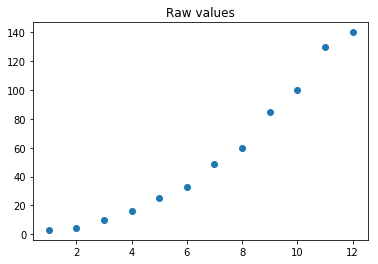

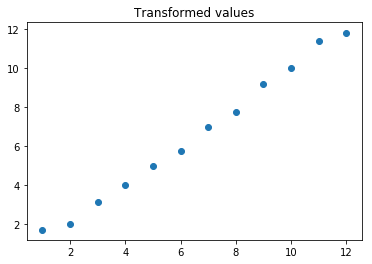

In [6]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

### Assumption two: multivariate normality

Error from the model should be normally distributed.

Calculate error: subtract the model-predicted values from the real outcome values

Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in data.

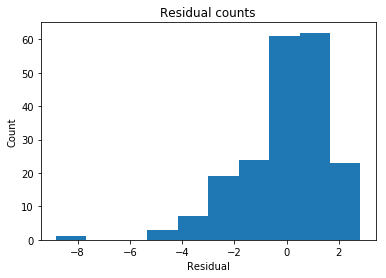

In [7]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption three: homoscedasticity

scedasticity = The distribution of your error

homoscedastic = the distribution of all predicted values are consistent

heteroscedasticity - the distribution of predicted values vary

Large predicted values will be too small when error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones.  This happens because confidence interval will be based on the average error variance.

This leads to overconfidence in the accuracy of your model's predictions.

Fix heteroscedasticity:  transform the dependent variable and add features that target the poorly-estimated areas.

For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.

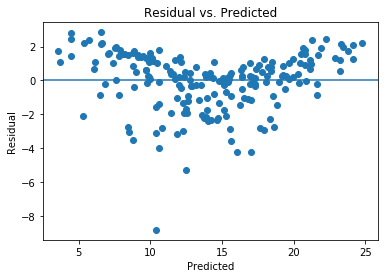

In [8]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption four: low multicollinearity

Correlations among features should be low or nonexistent.

When features are correlated, they may both explain the same pattern of variance in the outcome.  The model will attempt to find a solution, potentially by attributing half the explanatory power to one feature and half to the other.

#### High multicollinearity:

Problem: if we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.

Not a problem: when our only goal is prediction because all that matters is that variance gets explained.

To fix: use PCA or discard some of the correlated features.

In [9]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fix assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.


In [18]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [62]:
# Create a feature using a non-linear transformation.

drill_predicted = regr.predict(X).ravel()
drill_actual = np.sqrt(data['Sales'])

# Calculate the error, also called the residual.
drill_residual = drill_actual - drill_predicted


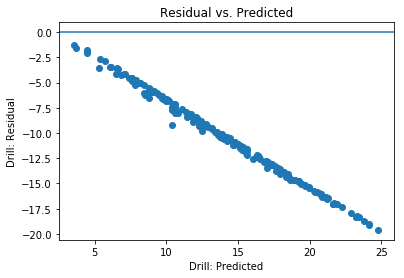

In [63]:

plt.scatter(drill_predicted, drill_residual)
plt.xlabel('Drill: Predicted Sales Error')
plt.ylabel('Drill: Residual Sales Error')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

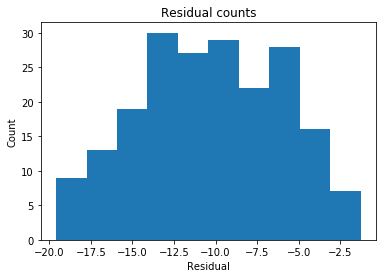

In [64]:
# This looks a bit concerning.
plt.hist(drill_residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()